# Part II - (Loan Data from Prosper)
## by (Alex Wang)

## Investigation Overview


> In this survey, we will delve into the variables that can affect a borrower's APR. Our main focus is the initial loan amount, ProsperRating (Alpha), and loan term.


## Dataset Overview and Executive Summary

> The dataset contains 113,937 loans with 81 variables for each loan, including loan amount, borrower interest rate (or interest rate), current loan status, borrower income, and more.

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load data
df = pd.read_csv('Loan_Data_Prosper.csv')

In [25]:
# Classification based on real data
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered = pd.CategoricalDtype(ordered=True, categories=rating_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered)
df['ProsperRating (Alpha)'].dtypes

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [26]:
# Define the hist build method
def histGraph(title,index_X,index_Y):
    fig, ax = plt.subplots(figsize=[12,6])
    ax.hist(df[index_X], bins=50, edgecolor='black', color='Green', alpha=0.7)
    median = df[index_X].median()
    ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_xlabel(index_X, fontsize=12, weight="bold")
    ax.set_ylabel(index_Y, fontsize=12, weight="bold")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper right')

    plt.show() 

## Borrower APR

>- A higher APR indicates a higher interest rate on borrowed funds, resulting in an increase in interest payments.
>- In the BorrowerAPR distribution map, there is a prominent peak near 0.08, 0.22, 0.26, 0.28, 0.30, a small peak near 0.17, and a significant peak near 0.38. Very few people have an APR of more than 0.4.

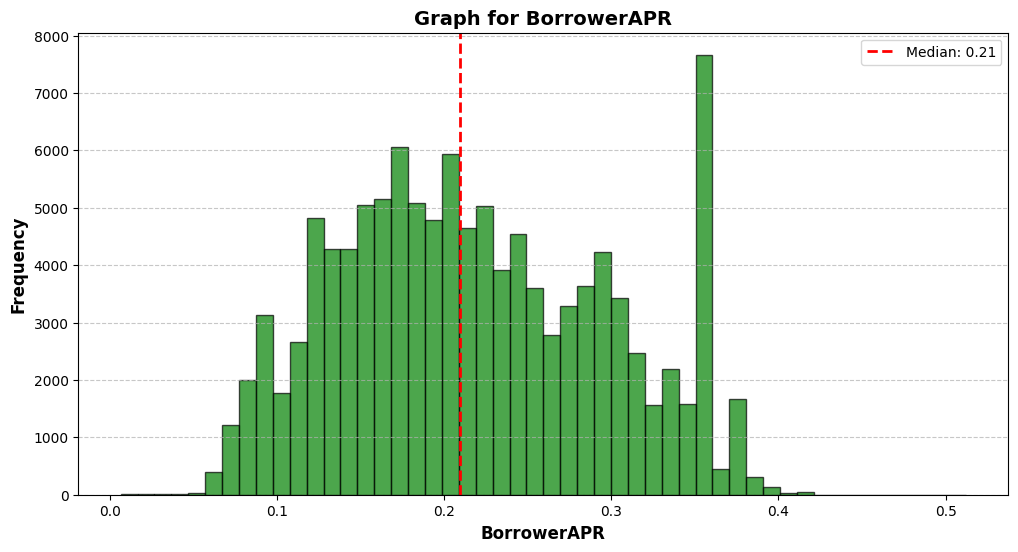

In [27]:
histGraph('Graph for BorrowerAPR','BorrowerAPR','Frequency')

## Original Loan Amount

>- The highest loan frequency is around `$3000`-`$4,000`, followed by `$14,000`-`$16,000` and `$9,000`-`$11,000`, with additional peaks at `$2,000` - `$3,000`.

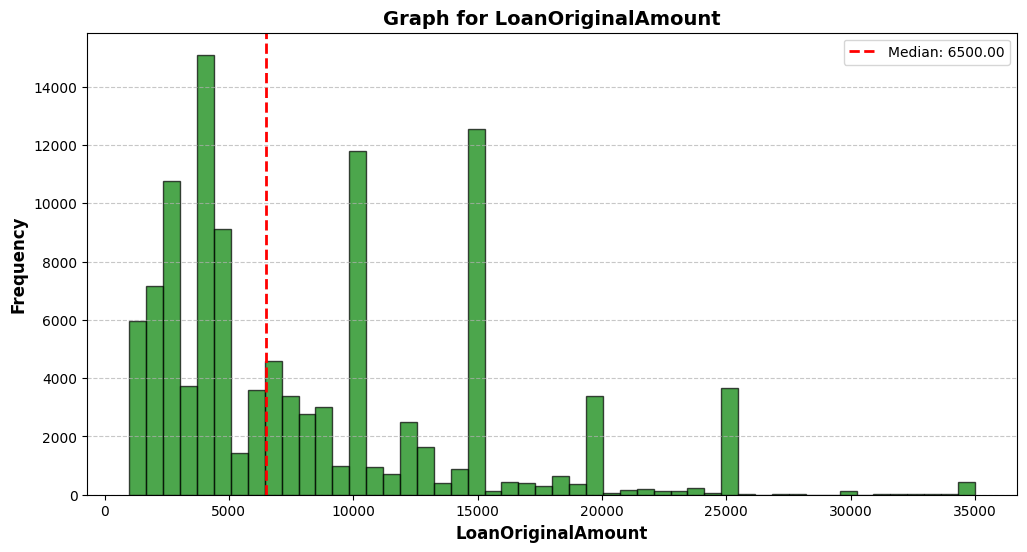

In [28]:
histGraph('Graph for LoanOriginalAmount','LoanOriginalAmount','Frequency')

## ProsperRating

In [29]:
# Customize aggregate statistics by Bar
def barGroupCustomized(title,name_x,name_y,group,value):
    plt.figure(figsize=[10, 4])  
    sns.barplot(x=value, y=value.index, color='green', order=group)  
    plt.xlabel(name_x)  
    plt.ylabel(name_y)  
    plt.title(title)  

    plt.show()  

>- The most common ratings are C, B, A and D

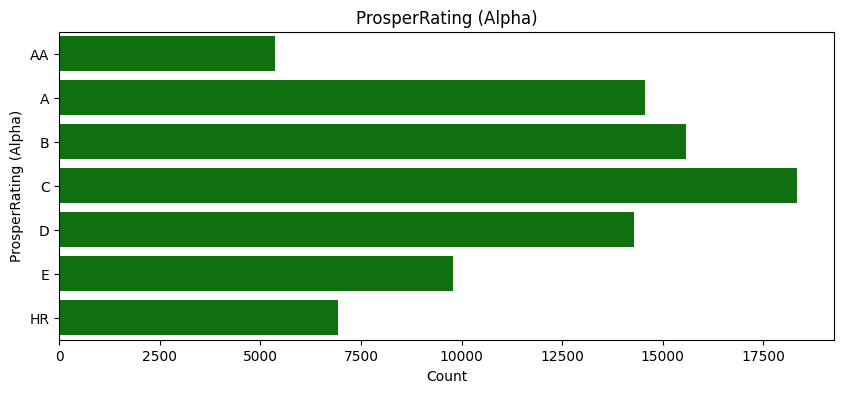

In [30]:
rating_order=['AA','A','B','C','D','E','HR']
ratings = df['ProsperRating (Alpha)'].value_counts()
barGroupCustomized('ProsperRating (Alpha)','Count','ProsperRating (Alpha)',rating_order,ratings)

## Borrower APR by Loan Term and ProsperRating (Alpha)

>- For AA, B, and C grades, the APR increases as the loan term increases，This means that the risk is higher, and such loans are too high and may enter a period of inflation.
>- In contrast, for C,D,E,HR ratings, APR usually decreases as the term of the loan is extended.It means attracting more borrowers.

In [34]:
#Borrower APR by Rating and Term barplot chart 
def barplot(title,x_name,y_name,hue,rating_order):
    sns.barplot(data=df, x=x_name, y=y_name, hue=hue, order=rating_order,
              palette='YlGnBu', errorbar='sd', capsize=0.2)
    plt.title(title)
    plt.ylabel('Mean'+ y_name)
    plt.xlabel(x_name);

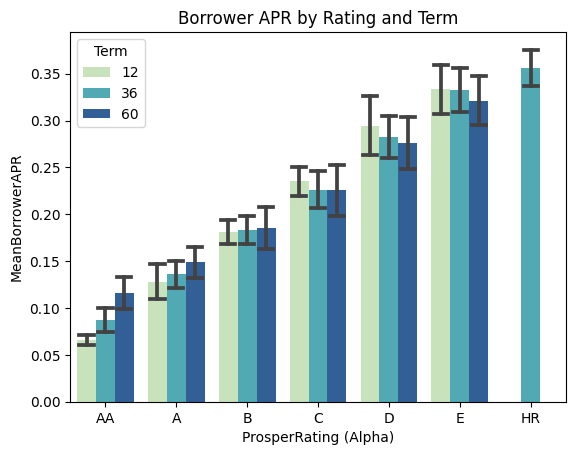

In [35]:
barplot('Borrower APR by Rating and Term','ProsperRating (Alpha)','BorrowerAPR','Term',rating_order)

In [37]:
!python -m nbconvert --to html Part_II_explanatory_template.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] Writing 768724 bytes to Part_II_explanatory_template.html
